In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import numpy as np
import calc_footprint_FFP_climatology as myfootprint
import pandas as pd
df=pd.read_csv('Kljun_input_files/fp_2019_70m.csv', sep=',')
df.dropna()
df2=df.dropna()

In [2]:
df2

,yyyy,mm,day,HH_UTC,MM,zm,d,u_mean,L,sigma_v,u_star,wind_dir
0,2019,1,1,0,15,70,13.4,7.69746,3075.050,2.569460,0.927765,165.284
1,2019,1,1,0,45,70,13.4,7.56519,1976.490,2.069590,0.740349,167.076
2,2019,1,1,1,15,70,13.4,7.63903,1833.850,2.036690,0.820046,164.365
3,2019,1,1,1,45,70,13.4,8.49137,2480.990,2.359860,0.901800,162.472
4,2019,1,1,2,15,70,13.4,9.04666,5977.850,2.781730,1.012640,163.737
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,45,70,13.4,6.15636,970.966,1.412910,0.666575,313.065
17516,2019,12,31,22,15,70,13.4,5.22115,374.454,1.060900,0.517620,303.505
17517,2019,12,31,22,45,70,13.4,5.14851,435.886,0.970058,0.578508,290.357
17518,2019,12,31,23,15,70,13.4,5.25642,265.816,0.889180,0.447541,281.231


In [3]:
df2.dtypes

yyyy          int64
mm            int64
day           int64
HH_UTC        int64
MM            int64
zm            int64
d           float64
u_mean      float64
L           float64
sigma_v     float64
u_star      float64
wind_dir    float64
dtype: object

In [4]:
df3=df2.loc[df2['u_star'] >= 0.2]

In [5]:
df3

,yyyy,mm,day,HH_UTC,MM,zm,d,u_mean,L,sigma_v,u_star,wind_dir
0,2019,1,1,0,15,70,13.4,7.69746,3075.050,2.569460,0.927765,165.284
1,2019,1,1,0,45,70,13.4,7.56519,1976.490,2.069590,0.740349,167.076
2,2019,1,1,1,15,70,13.4,7.63903,1833.850,2.036690,0.820046,164.365
3,2019,1,1,1,45,70,13.4,8.49137,2480.990,2.359860,0.901800,162.472
4,2019,1,1,2,15,70,13.4,9.04666,5977.850,2.781730,1.012640,163.737
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,45,70,13.4,6.15636,970.966,1.412910,0.666575,313.065
17516,2019,12,31,22,15,70,13.4,5.22115,374.454,1.060900,0.517620,303.505
17517,2019,12,31,22,45,70,13.4,5.14851,435.886,0.970058,0.578508,290.357
17518,2019,12,31,23,15,70,13.4,5.25642,265.816,0.889180,0.447541,281.231


In [6]:
[df3.L.min(), df3.L.max()]

[-9384380.0, 3792370.0]

In [7]:
df3['zma'] = df3['zm']-df3['d']

<ipython-input-7-a50893d3d31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zma'] = df3['zm']-df3['d']


In [8]:
# test how many elements violate the zm/L >= -15.5 criterion

[value for value in df3.zma/df3.L if value < -15.5]

[-20.232567284010194, -18.87044075481763]

In [9]:
zma = df3.zma.tolist()
z0a = None
umeana = df3.u_mean.tolist()
ha = [1000.] * len(df3.u_mean.values)
ola = df3.L.tolist()
sigmava = df3.sigma_v.tolist()
ustara = df3.u_star.tolist()
wind_dira=df3.wind_dir.tolist()

# here some playing with the grid of the Kljun model

dxy = 20.    # grid cell size in m

In [317]:
list(map(len,[zma,umeana,ha,ola,sigmava,ustara,wind_dira]))

[13827, 13827, 13827, 13827, 13827, 13827, 13827]


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

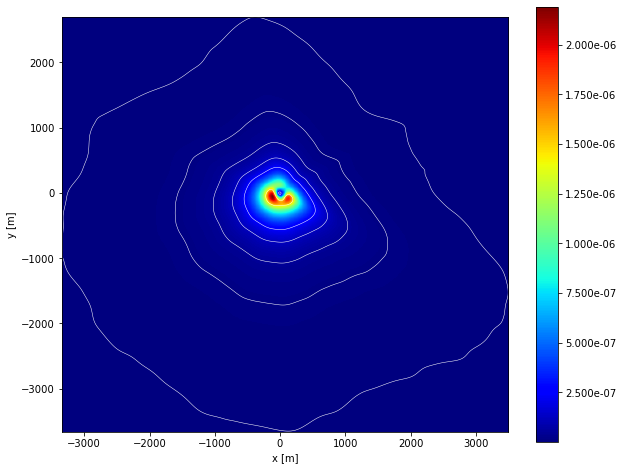

--- 130.35212993621826 seconds ---


In [151]:
# Running the Kljun model with an ensemble of three dummy data sets

import time
start_time = time.time()

FFP = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

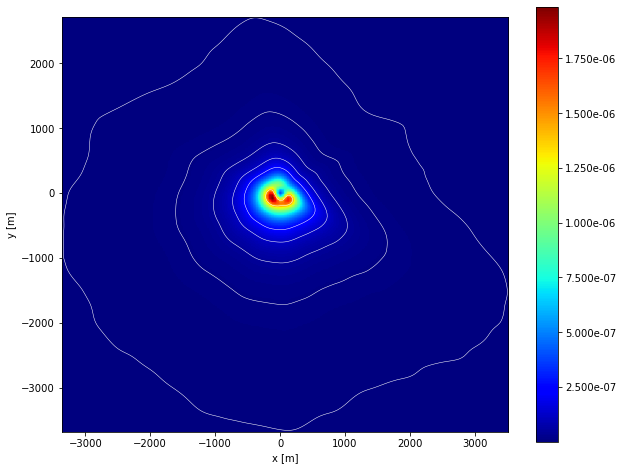

--- 31.52567219734192 seconds ---


In [152]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 40.    # grid cell size in m

#import time
start_time = time.time()

FFP2 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

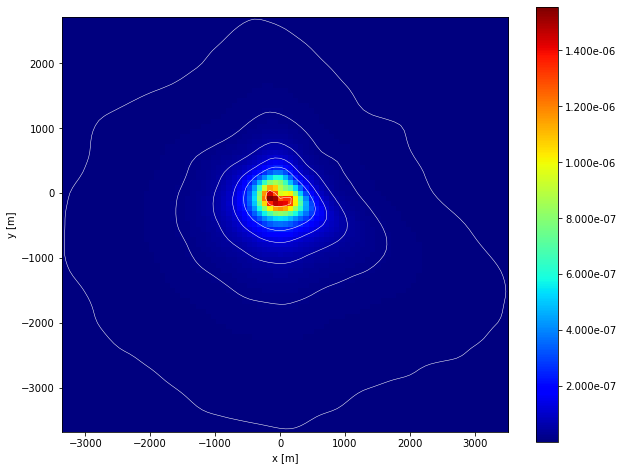

--- 8.662425518035889 seconds ---


In [153]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 80.    # grid cell size in m

#import time
start_time = time.time()

FFP3 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

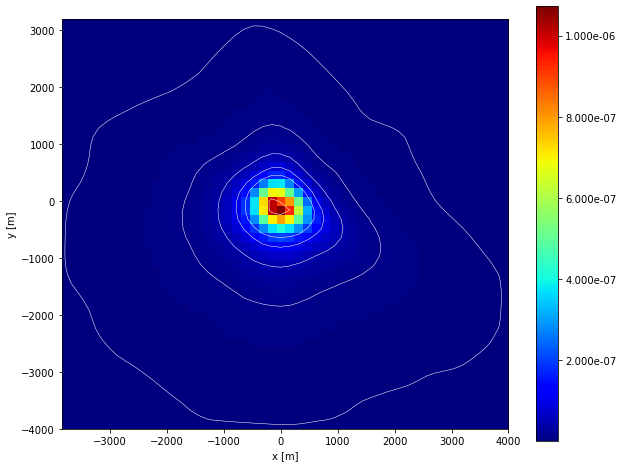

--- 2.940915584564209 seconds ---


In [154]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 160.    # grid cell size in m

#import time
start_time = time.time()

FFP4 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

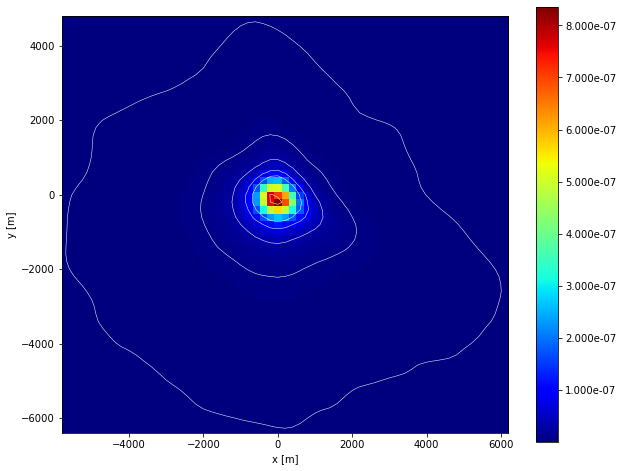

--- 4.796349048614502 seconds ---


In [177]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 200.    # grid cell size in m

#import time
start_time = time.time()

FFP4a = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-7000., 7000., -7000., 7000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

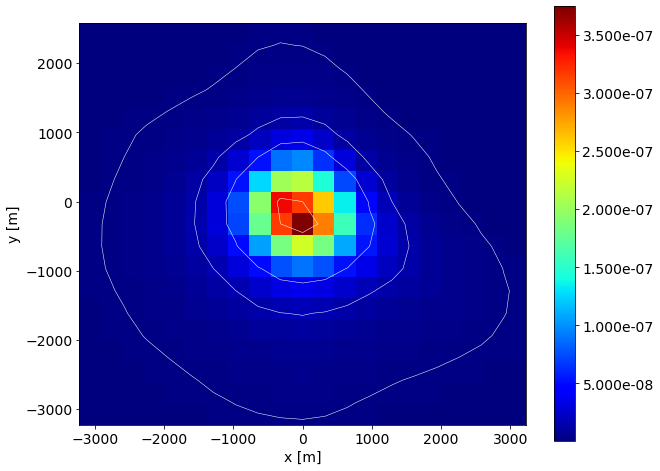

--- 3.7937817573547363 seconds ---


In [31]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 320.    # grid cell size in m

#import time
start_time = time.time()

FFP6 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-10000., 10000., -10000., 10000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

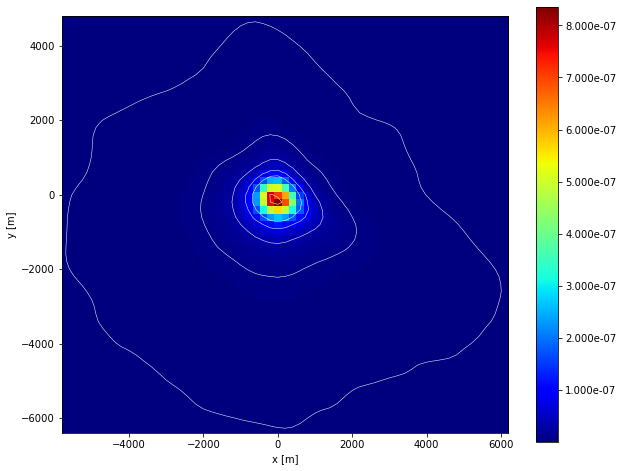

--- 786.2235462665558 seconds ---


In [231]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 320.    # grid cell size in m

#import time
start_time = time.time()

FFP7 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-100000., 100000., -100000., 100000.], # Joonas choice
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  #dx=dxy,
                                  #dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  13827
Calculating footprint  692  of  13827
Calculating footprint  1383  of  13827
Calculating footprint  2074  of  13827
Calculating footprint  2765  of  13827
Calculating footprint  3456  of  13827
Calculating footprint  4147  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  4838  of  13827

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5529  of  13827
Calculating footprint  6220  of  13827
Calculating footprint  6911  of  13827
Calculating footprint  7602  of  13827
Calcula

/home/jovyan/work/2021/neeluala/calc_footprint_FFP_climatology.py:510: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(x,y, f, [lev])


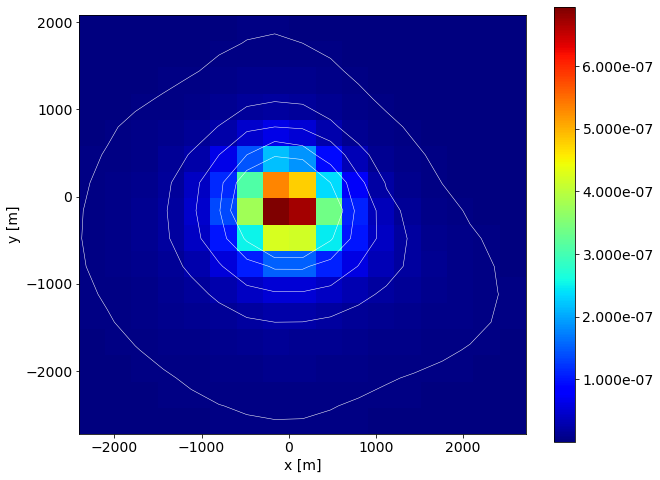

--- 1.9199016094207764 seconds ---


In [11]:
# Running the Kljun model with an ensemble of three dummy data sets

dxy = 320.    # grid cell size in m

#import time
start_time = time.time()

FFP8 = myfootprint.FFP_climatology(zm=zma,
                                  umean=umeana,
                                  h=ha,
                                  ol=ola,
                                  sigmav=sigmava,
                                  ustar=ustara,
                                  wind_dir=wind_dira,
                                  domain=[-4000., 4000., -4000., 4000.],
                                  rs=[10., 50., 60., 70., 80., 90.],
                                  dx=dxy,
                                  dy=dxy,
                                  smooth_data=0,
                                  crop=True,
                                  fig=True
                                 )
print("--- %s seconds ---" % (time.time() - start_time))

In [242]:
# This error flag need to be checked!
#
# In case it is 1 an error ocurred
# In case it is 2 not all contours are in the domain!   

[FFP["flag_err"],FFP2["flag_err"],FFP3["flag_err"],FFP4["flag_err"],FFP4a["flag_err"],FFP5["flag_err"],FFP6["flag_err"],FFP7["flag_err"]]

[0, 0, 0, 0, 0, 2, 2, 0]

In [14]:
# Check the length of the contour vectors

len(FFP8["xr"])

6

In [15]:
FFP8['flag_err']

2

In [25]:
for i in range(len(FFP8["xr"])):
    try:
        print(len(FFP8["xr"][i]))
    except: 
        print(None)

None
14
18
23
31
58


In [32]:
for i in range(len(FFP6["xr"])):
    try:
        print(len(FFP6["xr"][i]))
    except: 
        print(None)

8
26
36
71
None
None


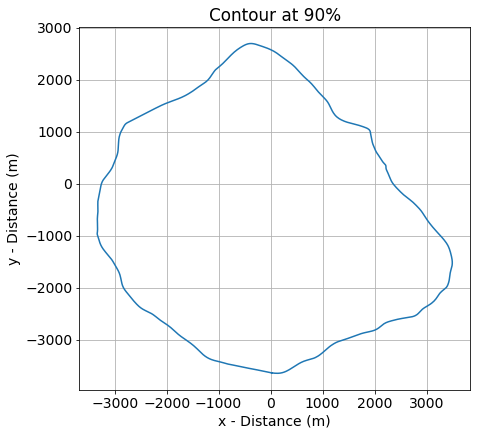

In [237]:
# Plot the 90% contour 
#
# CAUTION: Only possible if flag_err = 0! Then it's the last entry in xr!

x = FFP["xr"][-1]
y = FFP["yr"][-1]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.plot(x, y)
ax.grid()
ax.set_aspect(1)
plt.title('Contour at 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
#plt.axes().set_aspect('1', 'datalim')
plt.show()

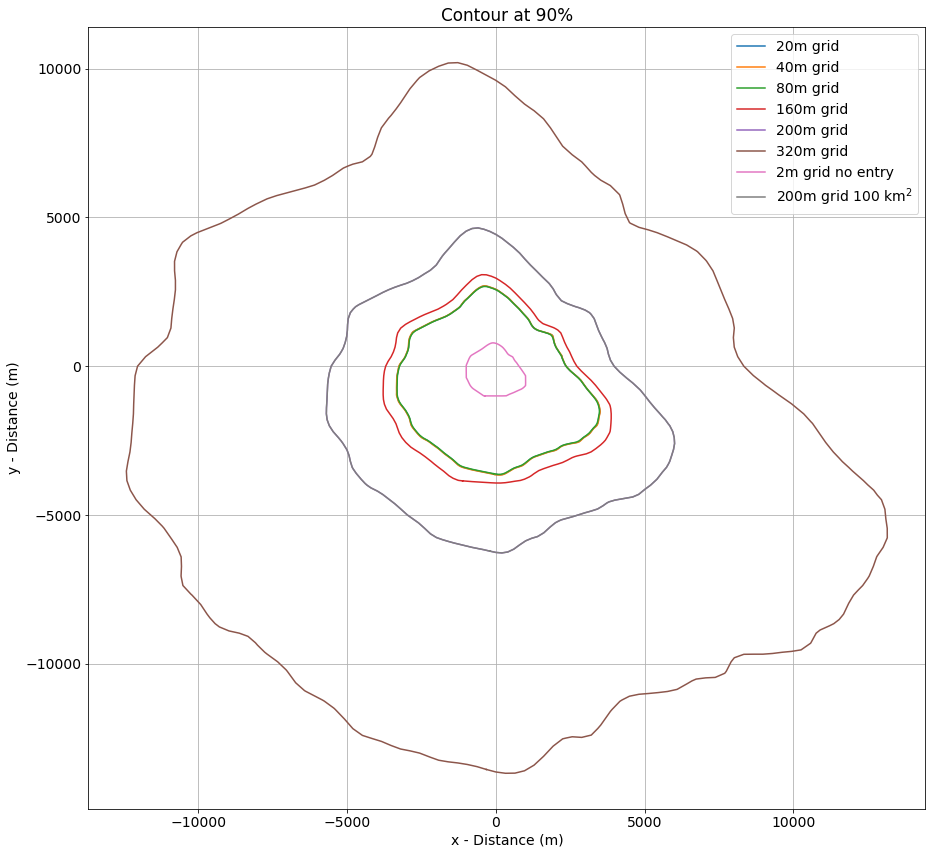

In [245]:
# Plot the 90% contour 
#
# CAUTION: Only possible if flag_err = 0! Then it's the last entry in xr!

x = FFP["xr"][-1]
y = FFP["yr"][-1]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot()
ax.plot(x, y, label='20m grid')
ax.plot(FFP2["xr"][-1], FFP2["yr"][-1], label='40m grid 90%')
ax.plot(FFP3["xr"][-1], FFP3["yr"][-1], label='80m grid 90%')
ax.plot(FFP4["xr"][-1], FFP4["yr"][-1], label='160m grid 90%')
ax.plot(FFP4a["xr"][-1], FFP4a["yr"][-1], label='200m grid 90%')
ax.plot(FFP5["xr"][-2], FFP5["yr"][-2], label='320m grid')
#ax.plot(FFP5["xr"][0], FFP5["yr"][0], label='320m grid')
ax.plot(FFP6["xr"][-3], FFP6["yr"][-3], label='2m grid no entry')
ax.plot(FFP7["xr"][-1], FFP7["yr"][-1], label='200m grid 100 km$^2$')
ax.grid()
ax.set_aspect(1)
plt.title('Contour at 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.show()

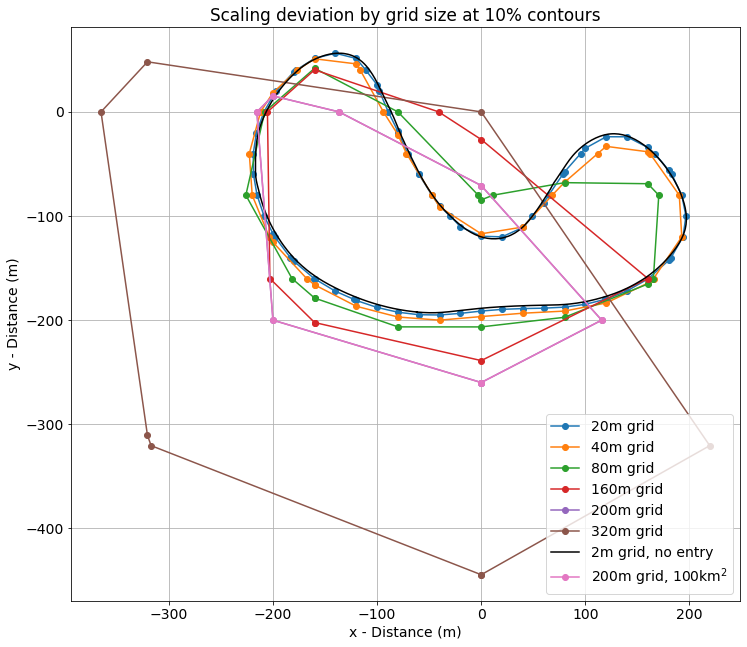

In [322]:
# Plot the 90% contour 
#
# CAUTION: Only possible if flag_err = 0! Then it's the last entry in xr!

x = FFP["xr"][-1]
y = FFP["yr"][-1]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
ax.plot(FFP["xr"][0], FFP["yr"][0], 'o-', label='20m grid') 
ax.plot(FFP2["xr"][0], FFP2["yr"][0], 'o-', label='40m grid')
ax.plot(FFP3["xr"][0], FFP3["yr"][0], 'o-', label='80m grid')
ax.plot(FFP4["xr"][0], FFP4["yr"][0], 'o-', label='160m grid')
ax.plot(FFP4a["xr"][0], FFP4a["yr"][0], 'o-', label='200m grid')
ax.plot(FFP5["xr"][0], FFP5["yr"][0], 'o-', label='320m grid')
ax.plot(FFP6["xr"][0], FFP6["yr"][0], color = 'black', label='2m grid, no entry') 
ax.plot(FFP7["xr"][0], FFP7["yr"][0], 'o-', label='200m grid, 100km$^2$') 
ax.grid()
ax.set_aspect(1)
plt.title('Scaling deviation by grid size at 10% contours')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_10perc_grid.png')
#plt.show()

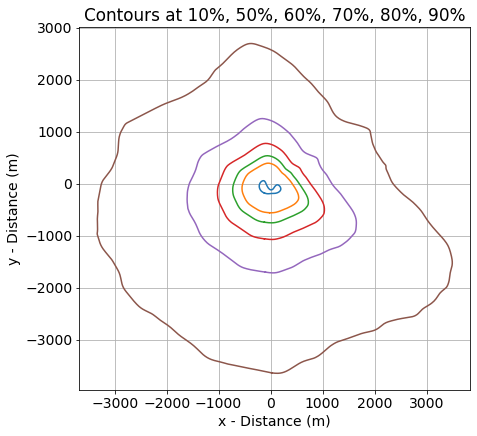

In [240]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

for i in range(len(FFP["xr"])):
    ax.plot(FFP["xr"][i], FFP["yr"][i])

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 10%, 50%, 60%, 70%, 80%, 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('FP_2019_70m')

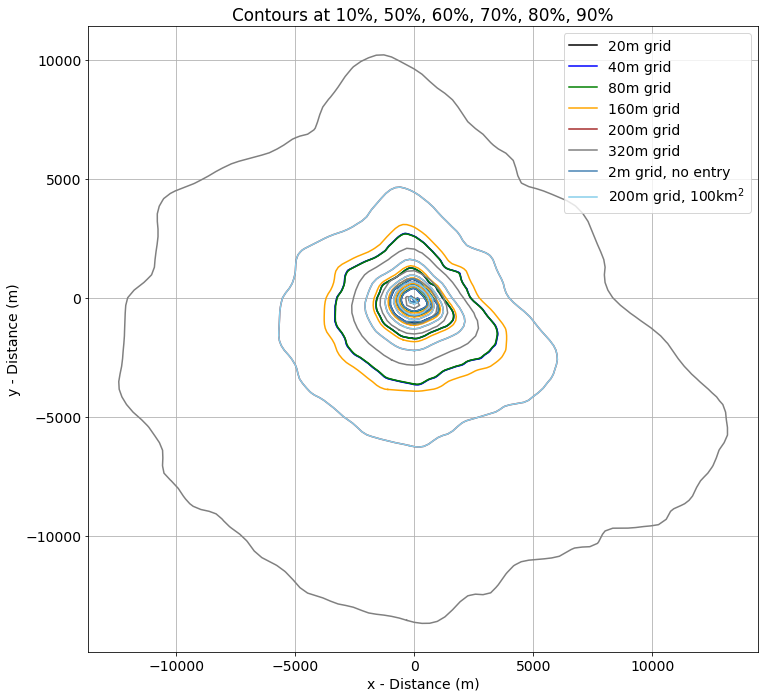

In [279]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()

#for i in range(len(FFP["xr"])):
ax.plot(FFP["xr"][0], FFP["yr"][0],color='black')
ax.plot(FFP["xr"][1], FFP["yr"][1],color='black')
ax.plot(FFP["xr"][2], FFP["yr"][2],color='black')
ax.plot(FFP["xr"][3], FFP["yr"][3],color='black')
ax.plot(FFP["xr"][4], FFP["yr"][4],color='black')
ax.plot(FFP["xr"][5], FFP["yr"][5],color='black', label='20m grid')

ax.plot(FFP2["xr"][0], FFP2["yr"][0],color='blue')
ax.plot(FFP2["xr"][1], FFP2["yr"][1],color='blue')
ax.plot(FFP2["xr"][2], FFP2["yr"][2],color='blue')
ax.plot(FFP2["xr"][3], FFP2["yr"][3],color='blue')
ax.plot(FFP2["xr"][4], FFP2["yr"][4],color='blue')
ax.plot(FFP2["xr"][5], FFP2["yr"][5],color='blue', label='40m grid')

ax.plot(FFP3["xr"][0], FFP3["yr"][0],color='green')
ax.plot(FFP3["xr"][1], FFP3["yr"][1],color='green')
ax.plot(FFP3["xr"][2], FFP3["yr"][2],color='green')
ax.plot(FFP3["xr"][3], FFP3["yr"][3],color='green')
ax.plot(FFP3["xr"][4], FFP3["yr"][4],color='green')
ax.plot(FFP3["xr"][5], FFP3["yr"][5],color='green', label='80m grid')

ax.plot(FFP4["xr"][0], FFP4["yr"][0],color='orange')
ax.plot(FFP4["xr"][1], FFP4["yr"][1],color='orange')
ax.plot(FFP4["xr"][2], FFP4["yr"][2],color='orange')
ax.plot(FFP4["xr"][3], FFP4["yr"][3],color='orange')
ax.plot(FFP4["xr"][4], FFP4["yr"][4],color='orange')
ax.plot(FFP4["xr"][5], FFP4["yr"][5],color='orange', label='160m grid')

ax.plot(FFP4a["xr"][0], FFP4a["yr"][0],color='brown')
ax.plot(FFP4a["xr"][1], FFP4a["yr"][1],color='brown')
ax.plot(FFP4a["xr"][2], FFP4a["yr"][2],color='brown')
ax.plot(FFP4a["xr"][3], FFP4a["yr"][3],color='brown')
ax.plot(FFP4a["xr"][4], FFP4a["yr"][4],color='brown')
ax.plot(FFP4a["xr"][5], FFP4a["yr"][5],color='brown', label='200m grid')
    
    
ax.plot(FFP5["xr"][0], FFP5["yr"][0],color='gray')
ax.plot(FFP5["xr"][1], FFP5["yr"][1],color='gray')
ax.plot(FFP5["xr"][2], FFP5["yr"][2],color='gray')
ax.plot(FFP5["xr"][3], FFP5["yr"][3],color='gray')
ax.plot(FFP5["xr"][4], FFP5["yr"][4],color='gray', label='320m grid')

ax.plot(FFP6["xr"][0], FFP6["yr"][0],color='steelblue')
ax.plot(FFP6["xr"][1], FFP6["yr"][1],color='steelblue')
ax.plot(FFP6["xr"][2], FFP6["yr"][2],color='steelblue')
ax.plot(FFP6["xr"][3], FFP6["yr"][3],color='steelblue', label='2m grid, no entry')

ax.plot(FFP7["xr"][0], FFP7["yr"][0],color='skyblue')
ax.plot(FFP7["xr"][1], FFP7["yr"][1],color='skyblue')
ax.plot(FFP7["xr"][2], FFP7["yr"][2],color='skyblue')
ax.plot(FFP7["xr"][3], FFP7["yr"][3],color='skyblue')
ax.plot(FFP7["xr"][4], FFP7["yr"][4],color='skyblue')
ax.plot(FFP7["xr"][5], FFP7["yr"][5],color='skyblue', label='200m grid, 100km$^2$')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 10%, 50%, 60%, 70%, 80%, 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_deviations')

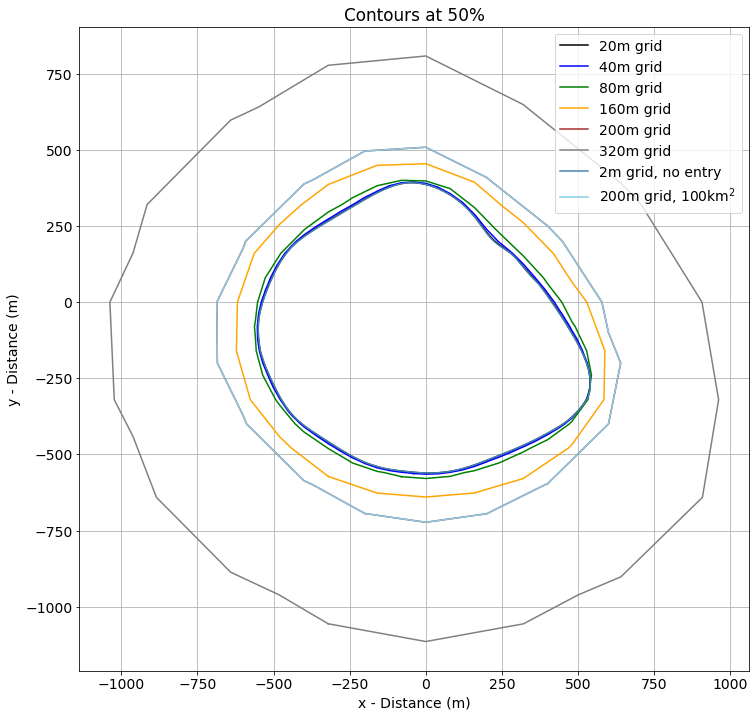

In [297]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()


ax.plot(FFP["xr"][1], FFP["yr"][1],color='black', label='20m grid')

ax.plot(FFP2["xr"][1], FFP2["yr"][1],color='blue', label='40m grid')

ax.plot(FFP3["xr"][1], FFP3["yr"][1],color='green', label='80m grid')

ax.plot(FFP4["xr"][1], FFP4["yr"][1],color='orange', label='160m grid')

ax.plot(FFP4a["xr"][1], FFP4a["yr"][1],color='brown', label='200m grid')
    
ax.plot(FFP5["xr"][1], FFP5["yr"][1],color='gray', label='320m grid')

ax.plot(FFP6["xr"][1], FFP6["yr"][1],color='steelblue', label='2m grid, no entry')

ax.plot(FFP7["xr"][1], FFP7["yr"][1],color='skyblue', label='200m grid, 100km$^2$')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 50%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_deviations_50perc')

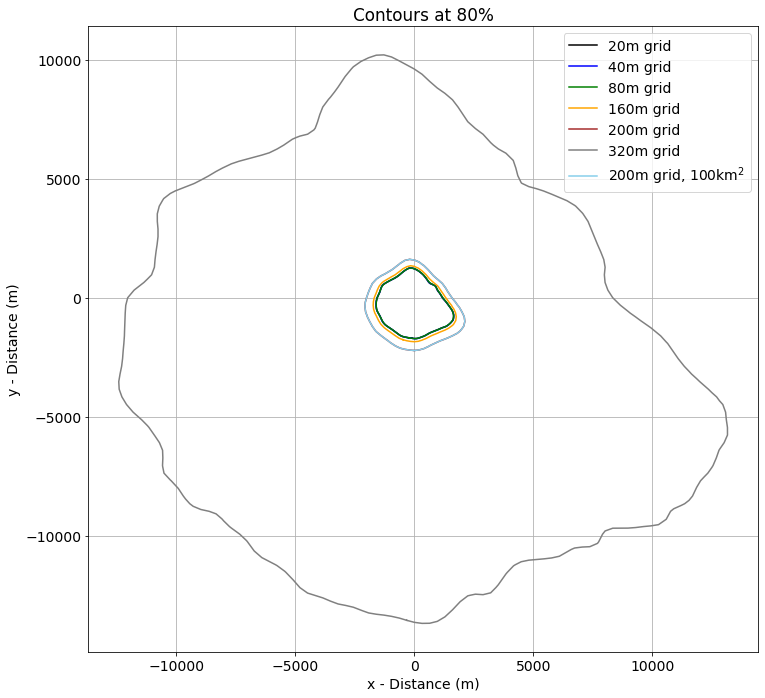

In [305]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()


ax.plot(FFP["xr"][4], FFP["yr"][4],color='black', label='20m grid')

ax.plot(FFP2["xr"][4], FFP2["yr"][4],color='blue', label='40m grid')

ax.plot(FFP3["xr"][4], FFP3["yr"][4],color='green', label='80m grid')

ax.plot(FFP4["xr"][4], FFP4["yr"][4],color='orange', label='160m grid')

ax.plot(FFP4a["xr"][4], FFP4a["yr"][4],color='brown', label='200m grid')
    
ax.plot(FFP5["xr"][4], FFP5["yr"][4],color='gray', label='320m grid')

#ax.plot(FFP6["xr"][4], FFP6["yr"][4],color='steelblue', label='2m grid, no entry') # failed to calculate

ax.plot(FFP7["xr"][4], FFP7["yr"][4],color='skyblue', label='200m grid, 100km$^2$')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 80%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_deviations_80perc')

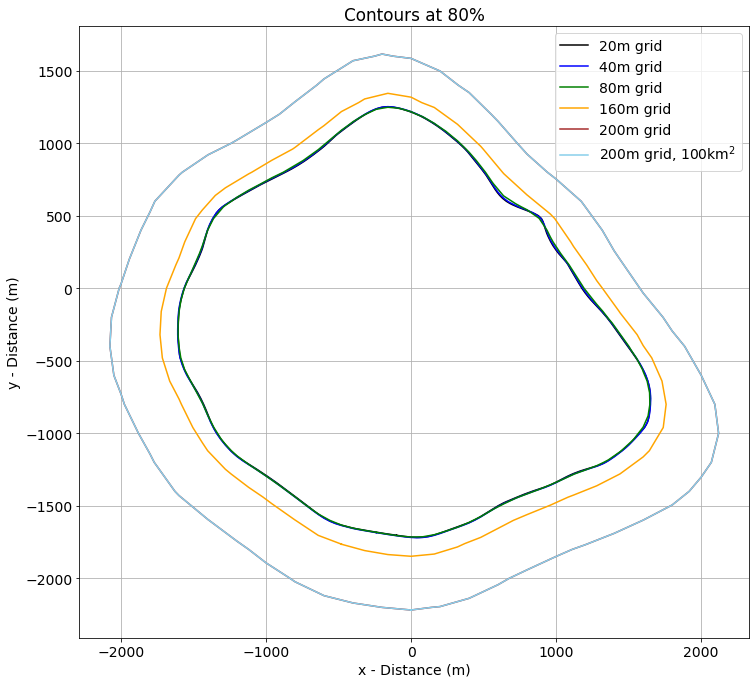

In [306]:
# Plot all the contours
#
# We have given three levels 10,50 and 90%!
# The three wind directions (10, 130 and 200 degree) determine the direction of the 
# elliptic 2D footprint area.

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()


ax.plot(FFP["xr"][4], FFP["yr"][4],color='black', label='20m grid')

ax.plot(FFP2["xr"][4], FFP2["yr"][4],color='blue', label='40m grid')

ax.plot(FFP3["xr"][4], FFP3["yr"][4],color='green', label='80m grid')

ax.plot(FFP4["xr"][4], FFP4["yr"][4],color='orange', label='160m grid')

ax.plot(FFP4a["xr"][4], FFP4a["yr"][4],color='brown', label='200m grid')
    
#ax.plot(FFP5["xr"][4], FFP5["yr"][4],color='gray', label='320m grid')

#ax.plot(FFP6["xr"][4], FFP6["yr"][4],color='steelblue', label='2m grid, no entry') # failed to calculate

ax.plot(FFP7["xr"][4], FFP7["yr"][4],color='skyblue', label='200m grid, 100km$^2$')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 80%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_deviations_80perc2')

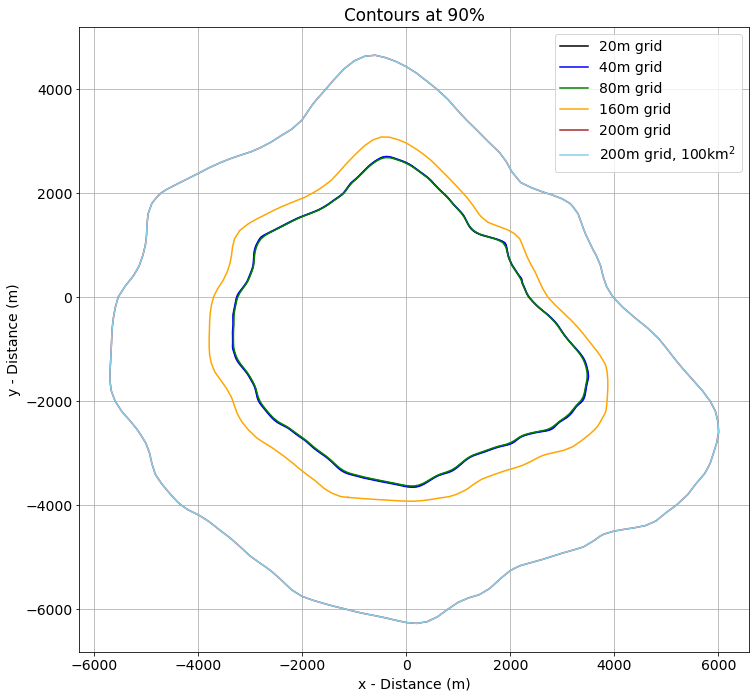

In [309]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()


ax.plot(FFP["xr"][5], FFP["yr"][5],color='black', label='20m grid')

ax.plot(FFP2["xr"][5], FFP2["yr"][5],color='blue', label='40m grid')

ax.plot(FFP3["xr"][5], FFP3["yr"][5],color='green', label='80m grid')

ax.plot(FFP4["xr"][5], FFP4["yr"][5],color='orange', label='160m grid')

ax.plot(FFP4a["xr"][5], FFP4a["yr"][5],color='brown', label='200m grid')
    
#ax.plot(FFP5["xr"][5], FFP5["yr"][5],color='gray', label='320m grid') # failed to calcualte

#ax.plot(FFP6["xr"][5], FFP6["yr"][5],color='steelblue', label='2m grid, no entry') # failed to calculate

ax.plot(FFP7["xr"][5], FFP7["yr"][5],color='skyblue', label='200m grid, 100km$^2$')

ax.grid()
ax.set_aspect(1)
plt.title('Contours at 90%')
plt.xlabel('x - Distance (m)')
plt.ylabel('y - Distance (m)')
plt.legend()
#plt.axes().set_aspect('1', 'datalim')
plt.savefig('70m_deviations_90perc')

In [257]:
for i in range(len(FFP['xr'])):
    print([len(FFP['xr'][i]), len(FFP2['xr'][i]),len(FFP3['xr'][i]),len(FFP4['xr'][i]),len(FFP4a['xr'][i])])
    
print('FFP5')
print([len(FFP5['xr'][0]),len(FFP5['xr'][1]),len(FFP5['xr'][2]),len(FFP5['xr'][3]),len(FFP5['xr'][4]),'none'])

print('FFP6')
print([len(FFP6['xr'][0]),len(FFP6['xr'][1]),len(FFP6['xr'][2]),len(FFP6['xr'][3]),'none','none'])

print('FFP7')
print([len(FFP7['xr'][0]),len(FFP7['xr'][1]),len(FFP7['xr'][2]),len(FFP7['xr'][3]),len(FFP7['xr'][4]),len(FFP7['xr'][5])])


[73, 37, 18, 9, 8]
[204, 102, 53, 27, 26]
[274, 138, 69, 36, 34]
[390, 194, 96, 52, 48]
[622, 312, 156, 82, 82]
[1316, 660, 328, 184, 228]
FFP5
[8, 25, 34, 64, 312, 'none']
FFP6
[764, 2046, 2748, 3782, 'none', 'none']
FFP7
[8, 26, 34, 48, 82, 228]


In [164]:
#Arvutan koordinaadid 90%
# Here it's wrong! The number of vectors is 6 (10-50-60-70-80-90) and the last vector is
# with number 6! See above len(FFP['xr']) equals 6. Therefore you save just the 60% vector as 90%! 

#coordinates2019_90_70m=pd.DataFrame(list(zip(FFP["xr"][2], FFP["yr"][2])),columns=["xr", "yr"])

# the shortcut notation for "last entry" is -1!
#
coordinates2019_90_70m=pd.DataFrame(list(zip(FFP["xr"][-1], FFP["yr"][-1])),columns=["xr", "yr"])

In [165]:
coordinates2019_90_70m.to_csv('coordinates2019_90_70m.csv')

In [166]:
#Arvutan koordinaadid 10%
coordinates2019_10_70m=pd.DataFrame(list(zip(FFP["xr"][0], FFP["yr"][0])),columns=["xr", "yr"])

In [167]:
coordinates2019_10_70m.to_csv('coordinates2019_10_70m.csv')

In [330]:
clevsa = myfootprint.get_contour_levels(FFP['fclim_2d'], 20., 20., FFP['rs'])

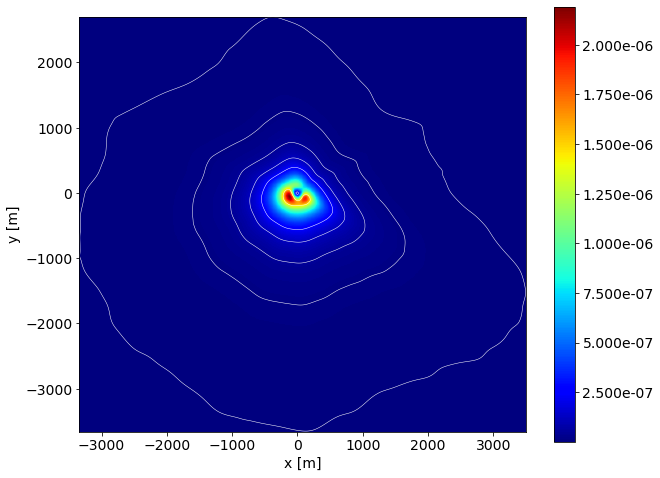

In [341]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP['x_2d'], y_2d=FFP['y_2d'], fs=FFP['fclim_2d'],
                                        show_heatmap=True, clevs=FFP['fr'])
figa.savefig('FFP20m.png')

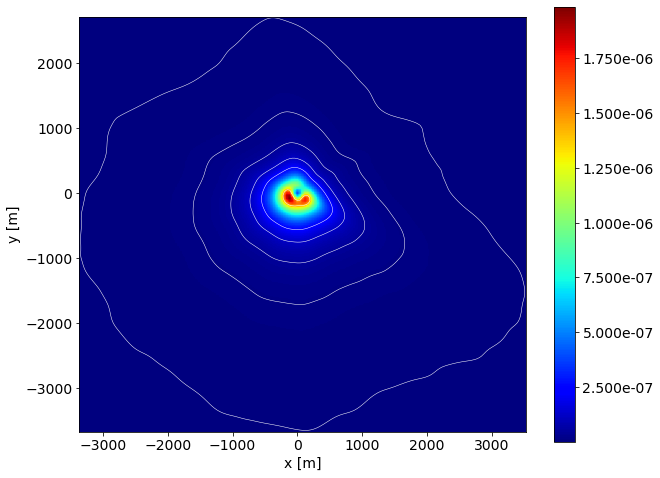

In [342]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP2['x_2d'], y_2d=FFP2['y_2d'], fs=FFP2['fclim_2d'],
                                        show_heatmap=True, clevs=FFP2['fr'])
figa.savefig('FFP40m.png')

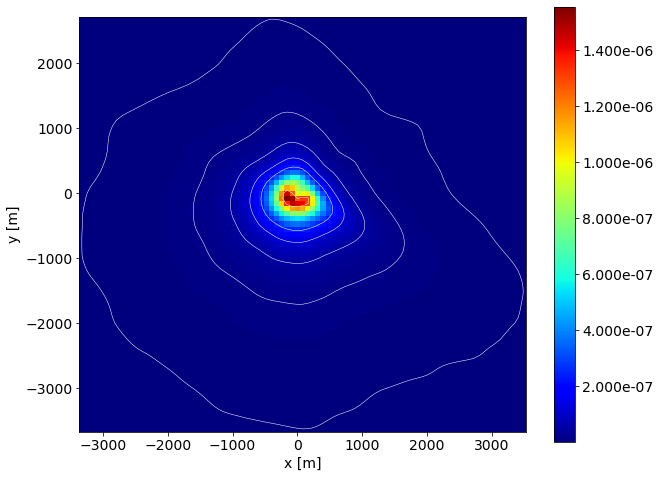

In [343]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP3['x_2d'], y_2d=FFP3['y_2d'], fs=FFP3['fclim_2d'],
                                        show_heatmap=True, clevs=FFP3['fr'])
figa.savefig('FFP80m.png')

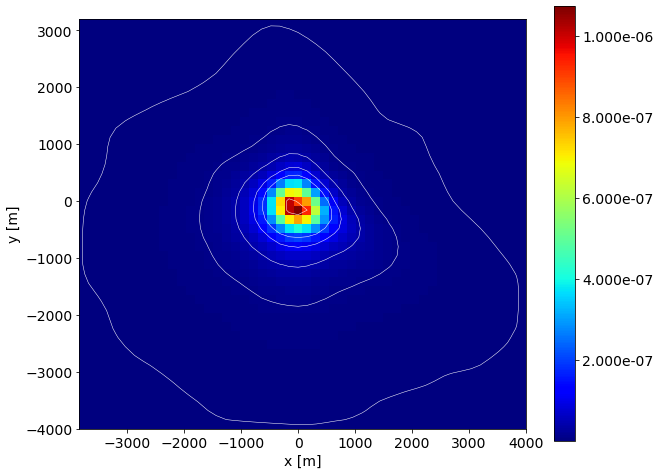

In [344]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP4['x_2d'], y_2d=FFP4['y_2d'], fs=FFP4['fclim_2d'],
                                        show_heatmap=True, clevs=FFP4['fr'])
figa.savefig('FFP160m.png')

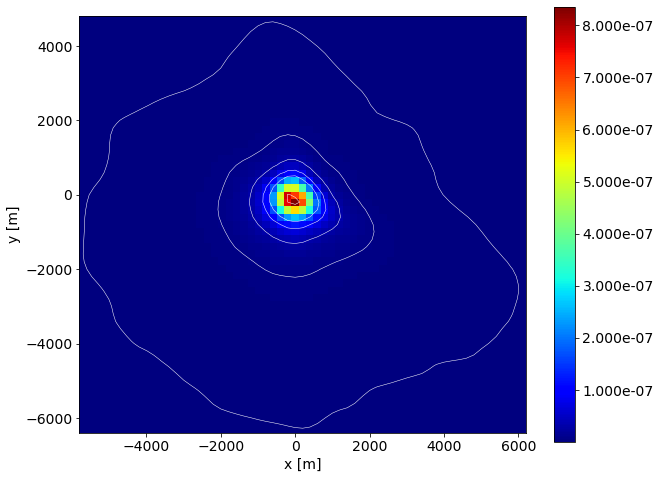

In [345]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP4a['x_2d'], y_2d=FFP4a['y_2d'], fs=FFP4a['fclim_2d'],
                                        show_heatmap=True, clevs=FFP4a['fr'])
figa.savefig('FFP200m.png')

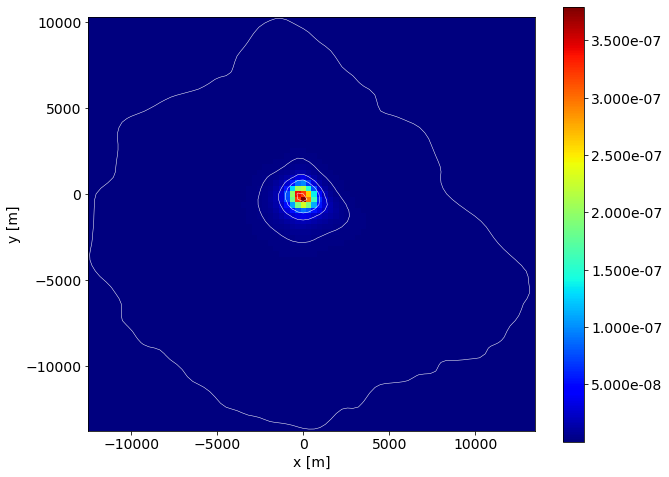

In [346]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP5['x_2d'], y_2d=FFP5['y_2d'], fs=FFP5['fclim_2d'],
                                        show_heatmap=True, clevs=FFP5['fr'])
figa.savefig('FFP320m.png')

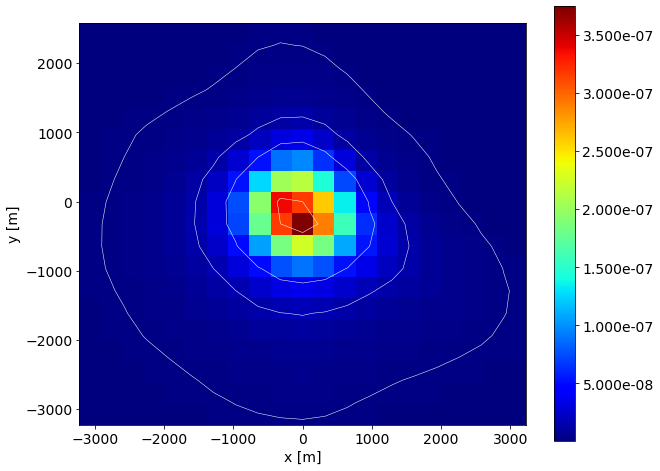

In [33]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP6['x_2d'], y_2d=FFP6['y_2d'], fs=FFP6['fclim_2d'],
                                        show_heatmap=True, clevs=FFP6['fr'])
#figa.savefig('FFP2mNoEntry.png')
figa.savefig('FFP320_20km.png')

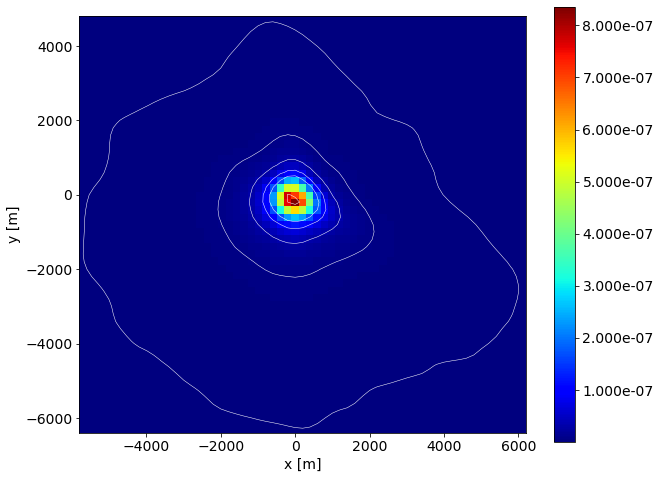

In [348]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP7['x_2d'], y_2d=FFP7['y_2d'], fs=FFP7['fclim_2d'],
                                        show_heatmap=True, clevs=FFP7['fr'])
figa.savefig('FFP200m_100km.png')

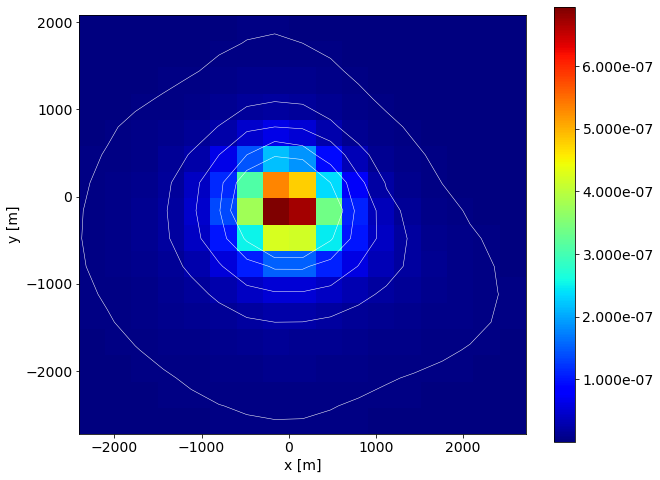

In [18]:
figa, axa = myfootprint.plot_footprint(x_2d=FFP8['x_2d'], y_2d=FFP8['y_2d'], fs=FFP8['fclim_2d'],
                                        show_heatmap=True, clevs=FFP8['fr'])
figa.savefig('FFP320m_8km.png')

In [340]:
with open('FFP_2019_70_m_20.pickle', 'wb') as handle:
    pkl.dump(FFP, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
with open('FFP_2019_70_m_40.pickle', 'wb') as handle:
    pkl.dump(FFP2, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
with open('FFP_2019_70_m_80.pickle', 'wb') as handle:
    pkl.dump(FFP3, handle, protocol=pkl.HIGHEST_PROTOCOL)

with open('FFP_2019_70_m_160.pickle', 'wb') as handle:
    pkl.dump(FFP4, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
with open('FFP_2019_70_m_200.pickle', 'wb') as handle:
    pkl.dump(FFP4a, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
with open('FFP_2019_70_m_320.pickle', 'wb') as handle:
    pkl.dump(FFP5, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
with open('FFP_2019_70_m_2m_nE.pickle', 'wb') as handle:
    pkl.dump(FFP6, handle, protocol=pkl.HIGHEST_PROTOCOL)

with open('FFP_2019_70_m_200_100km.pickle', 'wb') as handle:
    pkl.dump(FFP7, handle, protocol=pkl.HIGHEST_PROTOCOL)
    

In [20]:
with open('FFP_2019_70_m_320_8km.pickle', 'wb') as handle:
    pkl.dump(FFP8, handle, protocol=pkl.HIGHEST_PROTOCOL)

In [34]:
with open('FFP_2019_70_m_320m_20km.pickle', 'wb') as handle:
    pkl.dump(FFP6, handle, protocol=pkl.HIGHEST_PROTOCOL)